--- 
### Importando-Pacotes
--- 

In [56]:
import numpy as np
import pandas as pd
# from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

--- 
### Importando-Dataframe:
--- 

In [57]:
df = pd.read_csv("dataset/breast-cancer.csv")

--- 
### Verificação do Dataset
--- 

In [58]:
df.info() # Verificando se a campos com valor nulo, nenhum encontrado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

--- 
### Tratamento-de-Dados:
--- 

In [59]:
# Fazendo a codificação dos valores **qualitativos** em **quantitativos** (utilizado posteriormente para a **matriz de correlação**)

le = LabelEncoder()

df_num = df.copy(deep=True)

for atr in df_num.columns:
    df_num[atr] = le.fit_transform(df_num[atr].astype(str))
# display(df['diagnosis'].head())
# display(df_num['diagnosis'].head())

In [60]:
display(df['diagnosis'].head())

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [61]:
display(df_num['diagnosis'].head)

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

--- 
### Histogramas-Dataframe:
--- 

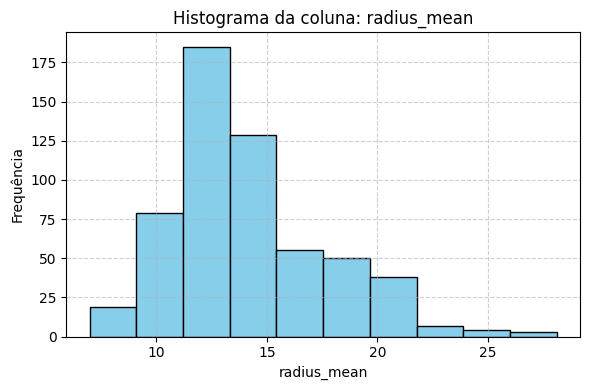

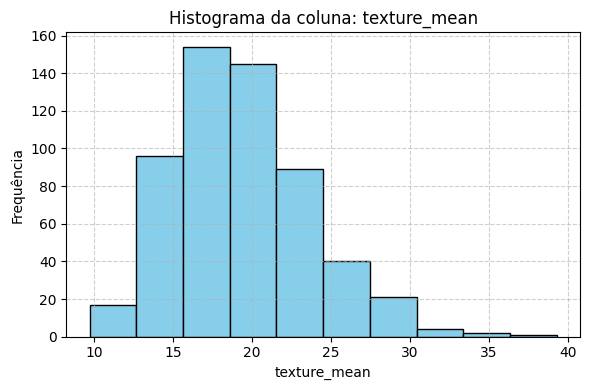

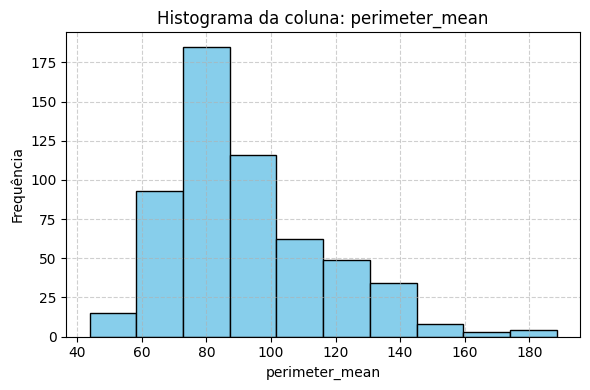

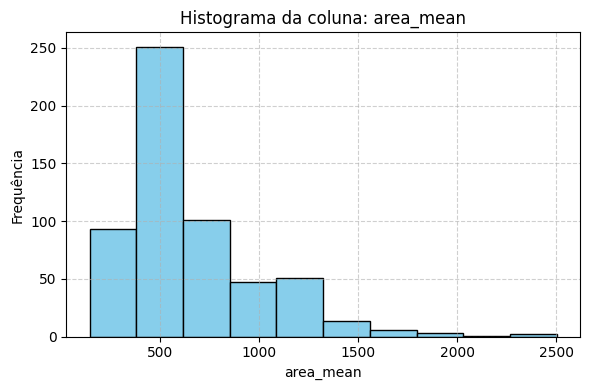

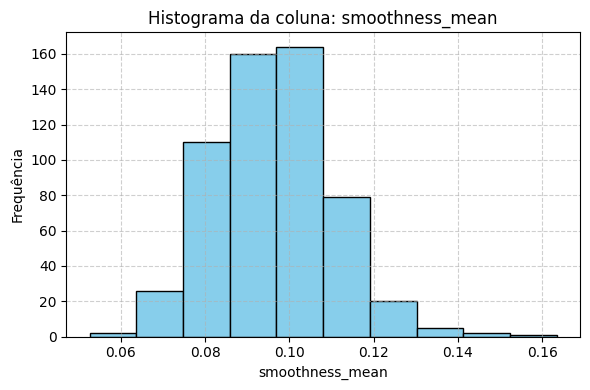

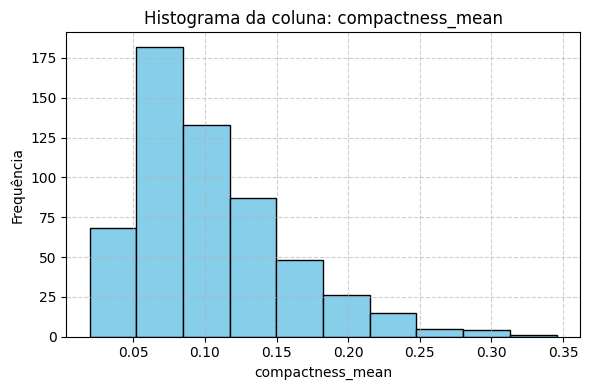

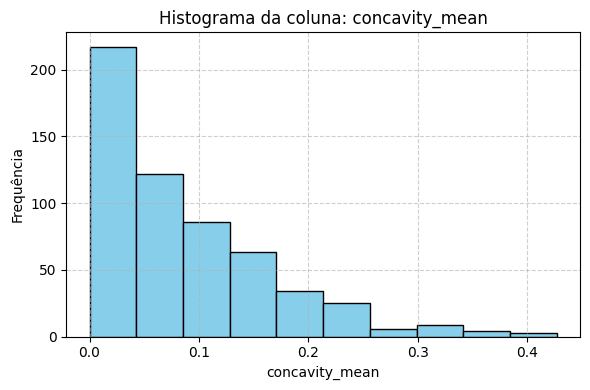

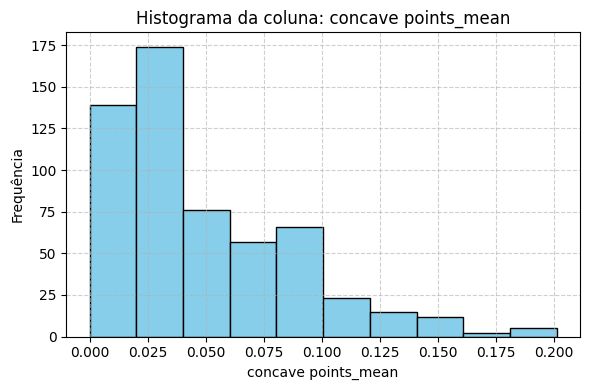

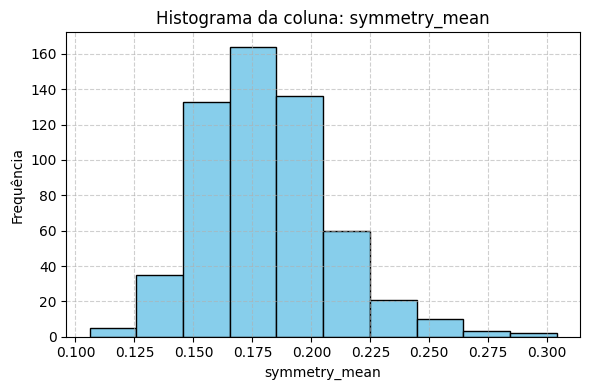

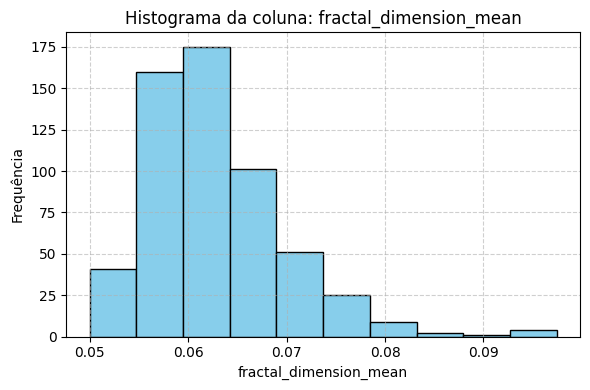

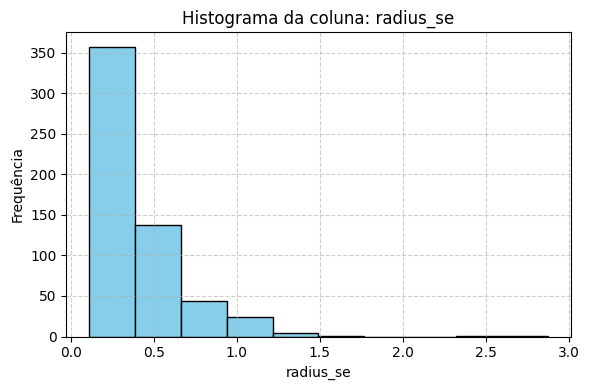

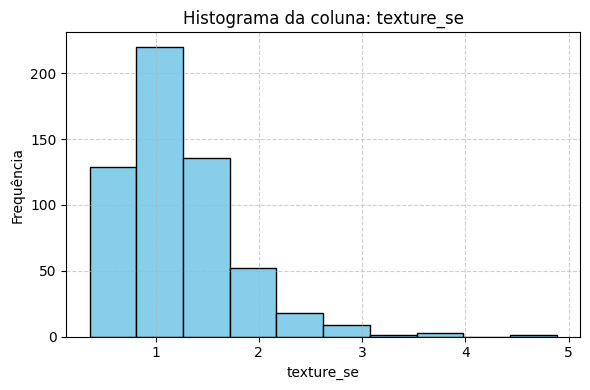

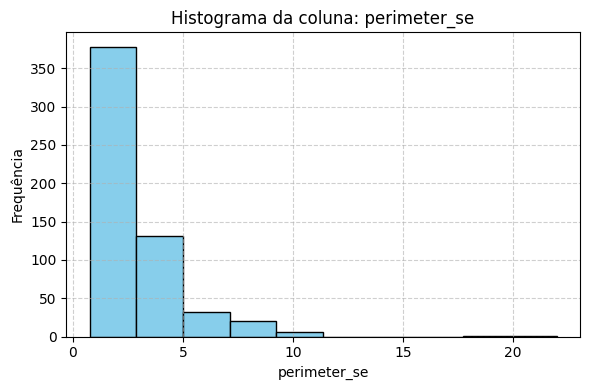

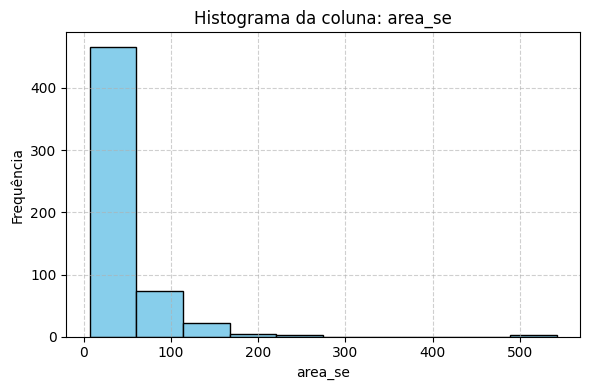

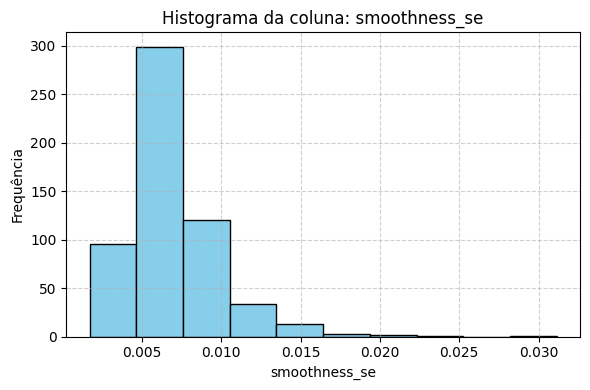

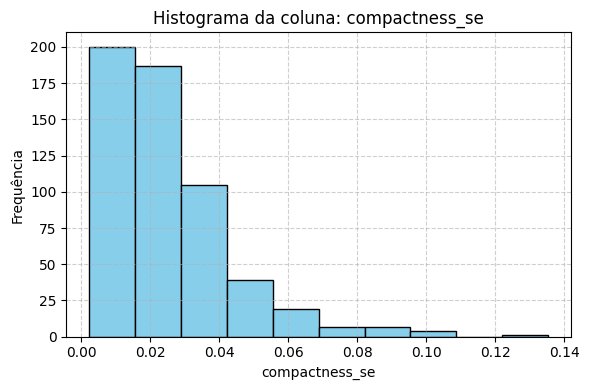

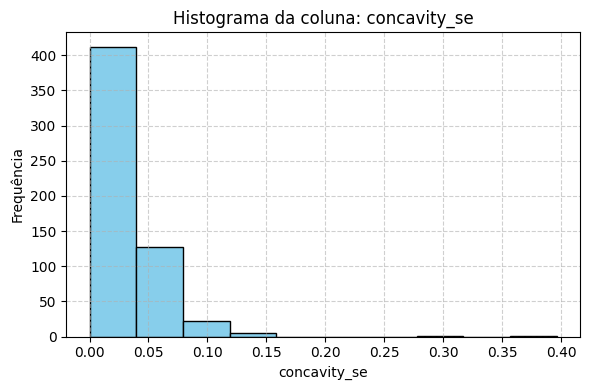

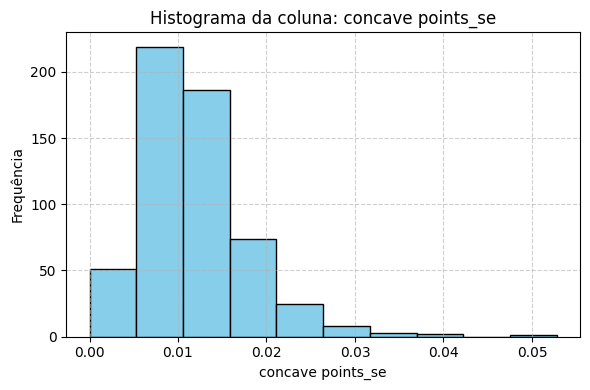

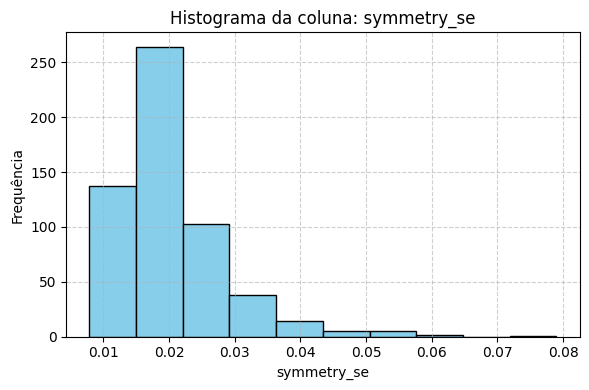

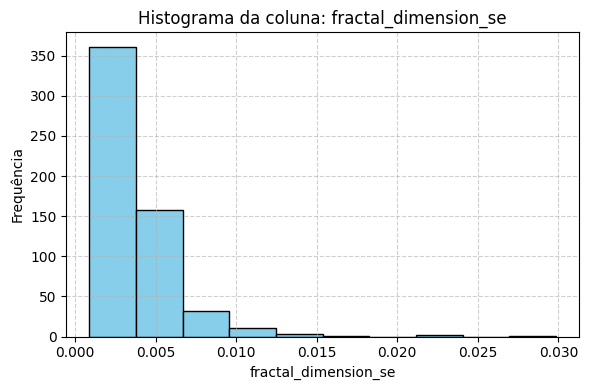

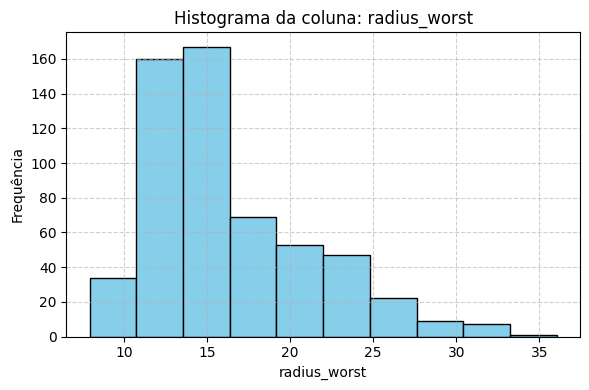

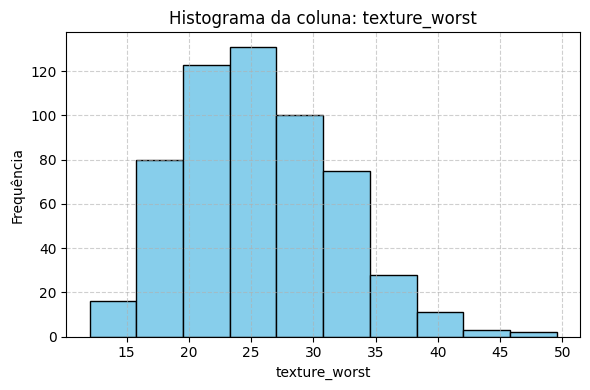

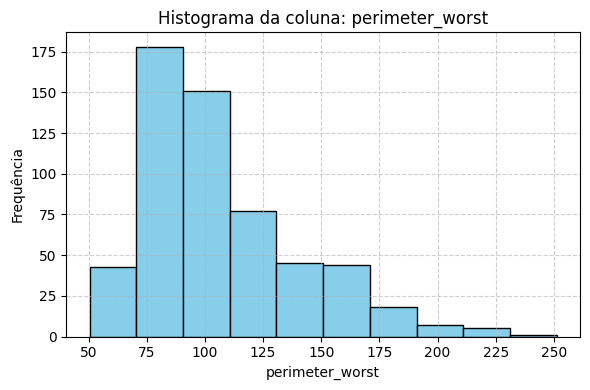

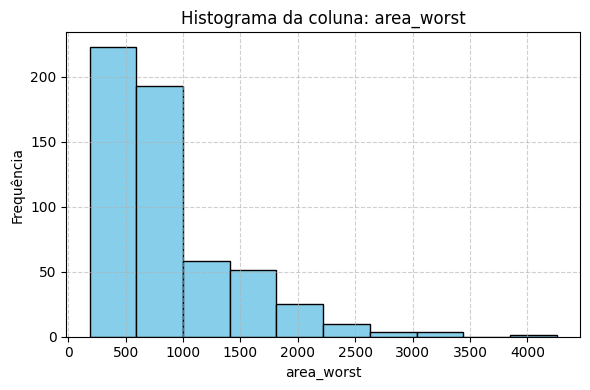

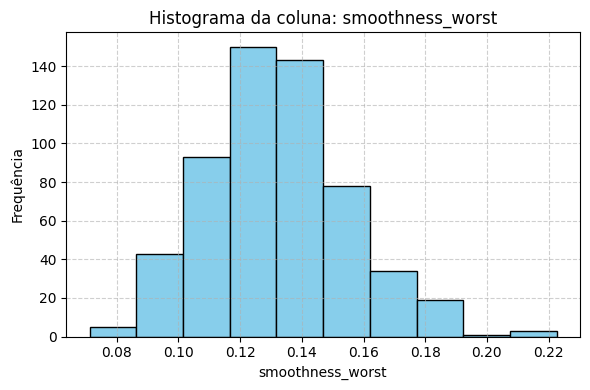

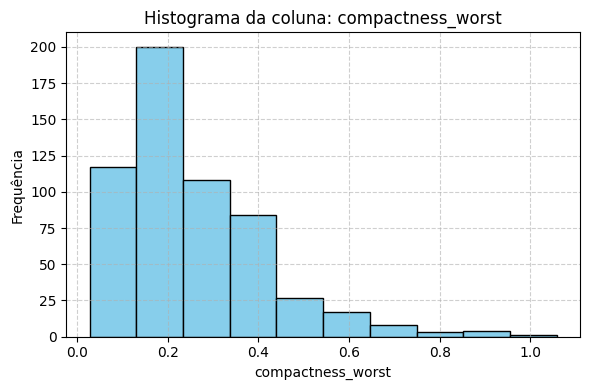

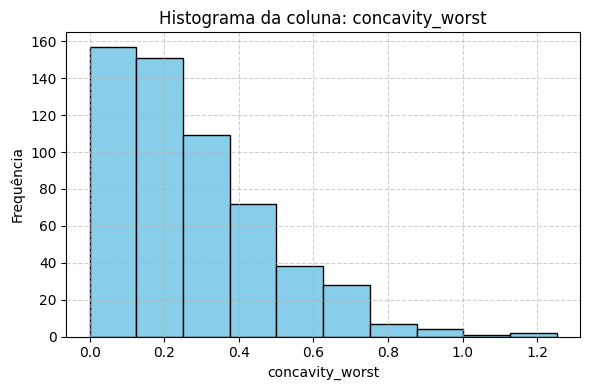

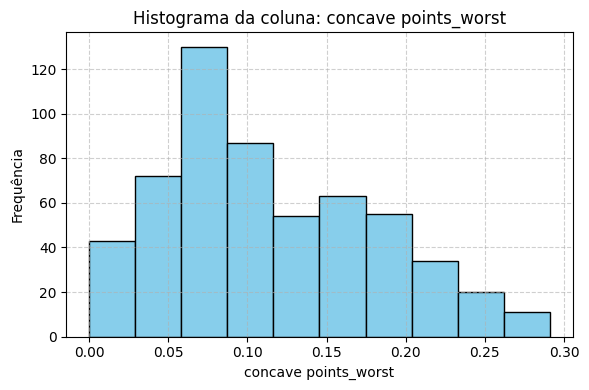

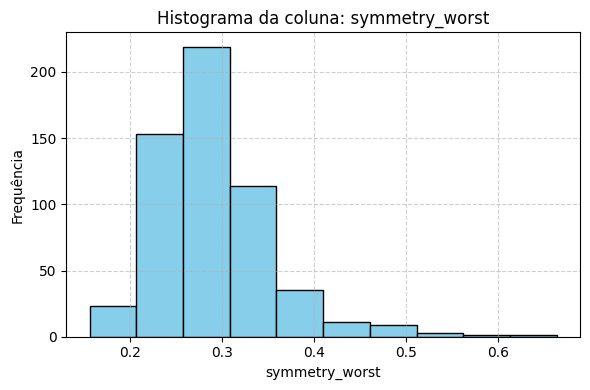

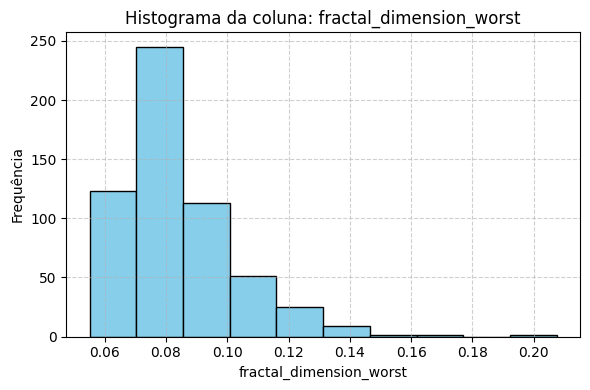

In [62]:
df_sem_id = df.iloc[:, 1:]  # ignora a primeira coluna (índice 0)

for coluna in df_sem_id.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_sem_id[coluna].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histograma da coluna: {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

--- 
### Matriz-de-Correlação:
--- 

In [63]:
corr = df_num.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.283615,-0.094474,0.029791,0.071740,-0.010351,-0.172127,-0.146826,-0.177377,-0.191924,-0.178225,-0.050662,-0.178649,0.045816,-0.147486,-0.104842,0.000963,-0.072908,-0.082247,-0.104810,-0.065421,-0.058700,-0.162086,0.001278,0.125248,0.085958,-0.182379,-0.146651,-0.165788,-0.181910,-0.229643,-0.123527
diagnosis,-0.283615,1.000000,0.497378,0.453708,-0.453239,0.004460,0.372423,0.605768,0.732390,0.779702,0.334370,-0.023166,0.620254,0.022706,0.617905,0.374827,-0.051898,0.379460,0.468409,0.487430,-0.090555,0.200631,0.694402,0.475669,-0.550087,-0.380945,0.426936,0.607784,0.704746,0.779755,0.397952,0.310819
radius_mean,-0.094474,0.497378,1.000000,0.218640,-0.436676,-0.167003,0.158479,0.360252,0.438979,0.460625,0.178545,-0.025749,0.489948,0.016814,0.470975,0.261538,0.018438,0.242236,0.293132,0.305276,0.020398,0.180570,0.687551,0.182309,-0.453373,-0.403126,0.176481,0.312815,0.373974,0.419383,0.155966,0.168753
texture_mean,0.029791,0.453708,0.218640,1.000000,-0.185691,-0.018015,0.022385,0.254932,0.333261,0.298722,0.099415,-0.057022,0.352843,0.441979,0.364319,0.169086,0.042335,0.253765,0.277578,0.227701,-0.000527,0.140452,0.322549,0.898567,-0.228494,-0.178910,0.103653,0.283069,0.330762,0.307215,0.107911,0.112364
perimeter_mean,0.071740,-0.453239,-0.436676,-0.185691,1.000000,0.336344,-0.204149,-0.268061,-0.334431,-0.334929,-0.221415,-0.038023,-0.409261,-0.098205,-0.381173,-0.197555,-0.191889,-0.201759,-0.245154,-0.257290,-0.117611,-0.182061,-0.340657,-0.155747,0.193698,0.765721,-0.224531,-0.200341,-0.263974,-0.295984,-0.168854,-0.126687
area_mean,-0.010351,0.004460,-0.167003,-0.018015,0.336344,1.000000,-0.088324,-0.023774,-0.019628,0.019036,-0.113260,-0.130947,-0.167841,-0.176966,-0.134187,0.076324,-0.251357,-0.066339,-0.061426,-0.060044,-0.248458,-0.159147,0.006150,0.011364,-0.206898,0.433846,-0.071934,0.052148,0.032706,0.051467,-0.030099,-0.044675
smoothness_mean,-0.172127,0.372423,0.158479,0.022385,-0.204149,-0.088324,1.000000,0.678077,0.517615,0.567139,0.533066,0.579841,0.330906,0.089535,0.314859,0.115242,0.337498,0.385748,0.352353,0.443599,0.142907,0.402635,0.175347,0.060254,-0.186512,-0.167867,0.800043,0.482157,0.430257,0.500685,0.389136,0.507820
compactness_mean,-0.146826,0.605768,0.360252,0.254932,-0.268061,-0.023774,0.678077,1.000000,0.896145,0.848325,0.550616,0.500494,0.506181,0.049170,0.562763,0.225358,0.127997,0.817550,0.772127,0.735055,0.097278,0.619522,0.464763,0.253131,-0.384249,-0.203824,0.583053,0.900967,0.837517,0.824822,0.448559,0.687206
concavity_mean,-0.177377,0.732390,0.438979,0.333261,-0.334431,-0.019628,0.517615,0.896145,1.000000,0.927381,0.448624,0.262631,0.577663,0.054617,0.627782,0.300039,0.071687,0.760938,0.857613,0.777077,0.024804,0.514672,0.581147,0.334521,-0.454123,-0.262732,0.490080,0.849735,0.938586,0.904064,0.384047,0.541612
concave points_mean,-0.191924,0.779702,0.460625,0.298722,-0.334929,0.019036,0.567139,0.848325,0.927381,1.000000,0.426771,0.146260,0.639861,0.012861,0.663682,0.334156,0.018467,0.606835,0.672697,0.760309,-0.025984,0.378647,0.630664,0.300847,-0.468227,-0.266452,0.493074,0.758364,0.827513,0.936857,0.357440,0.420894


<Axes: >

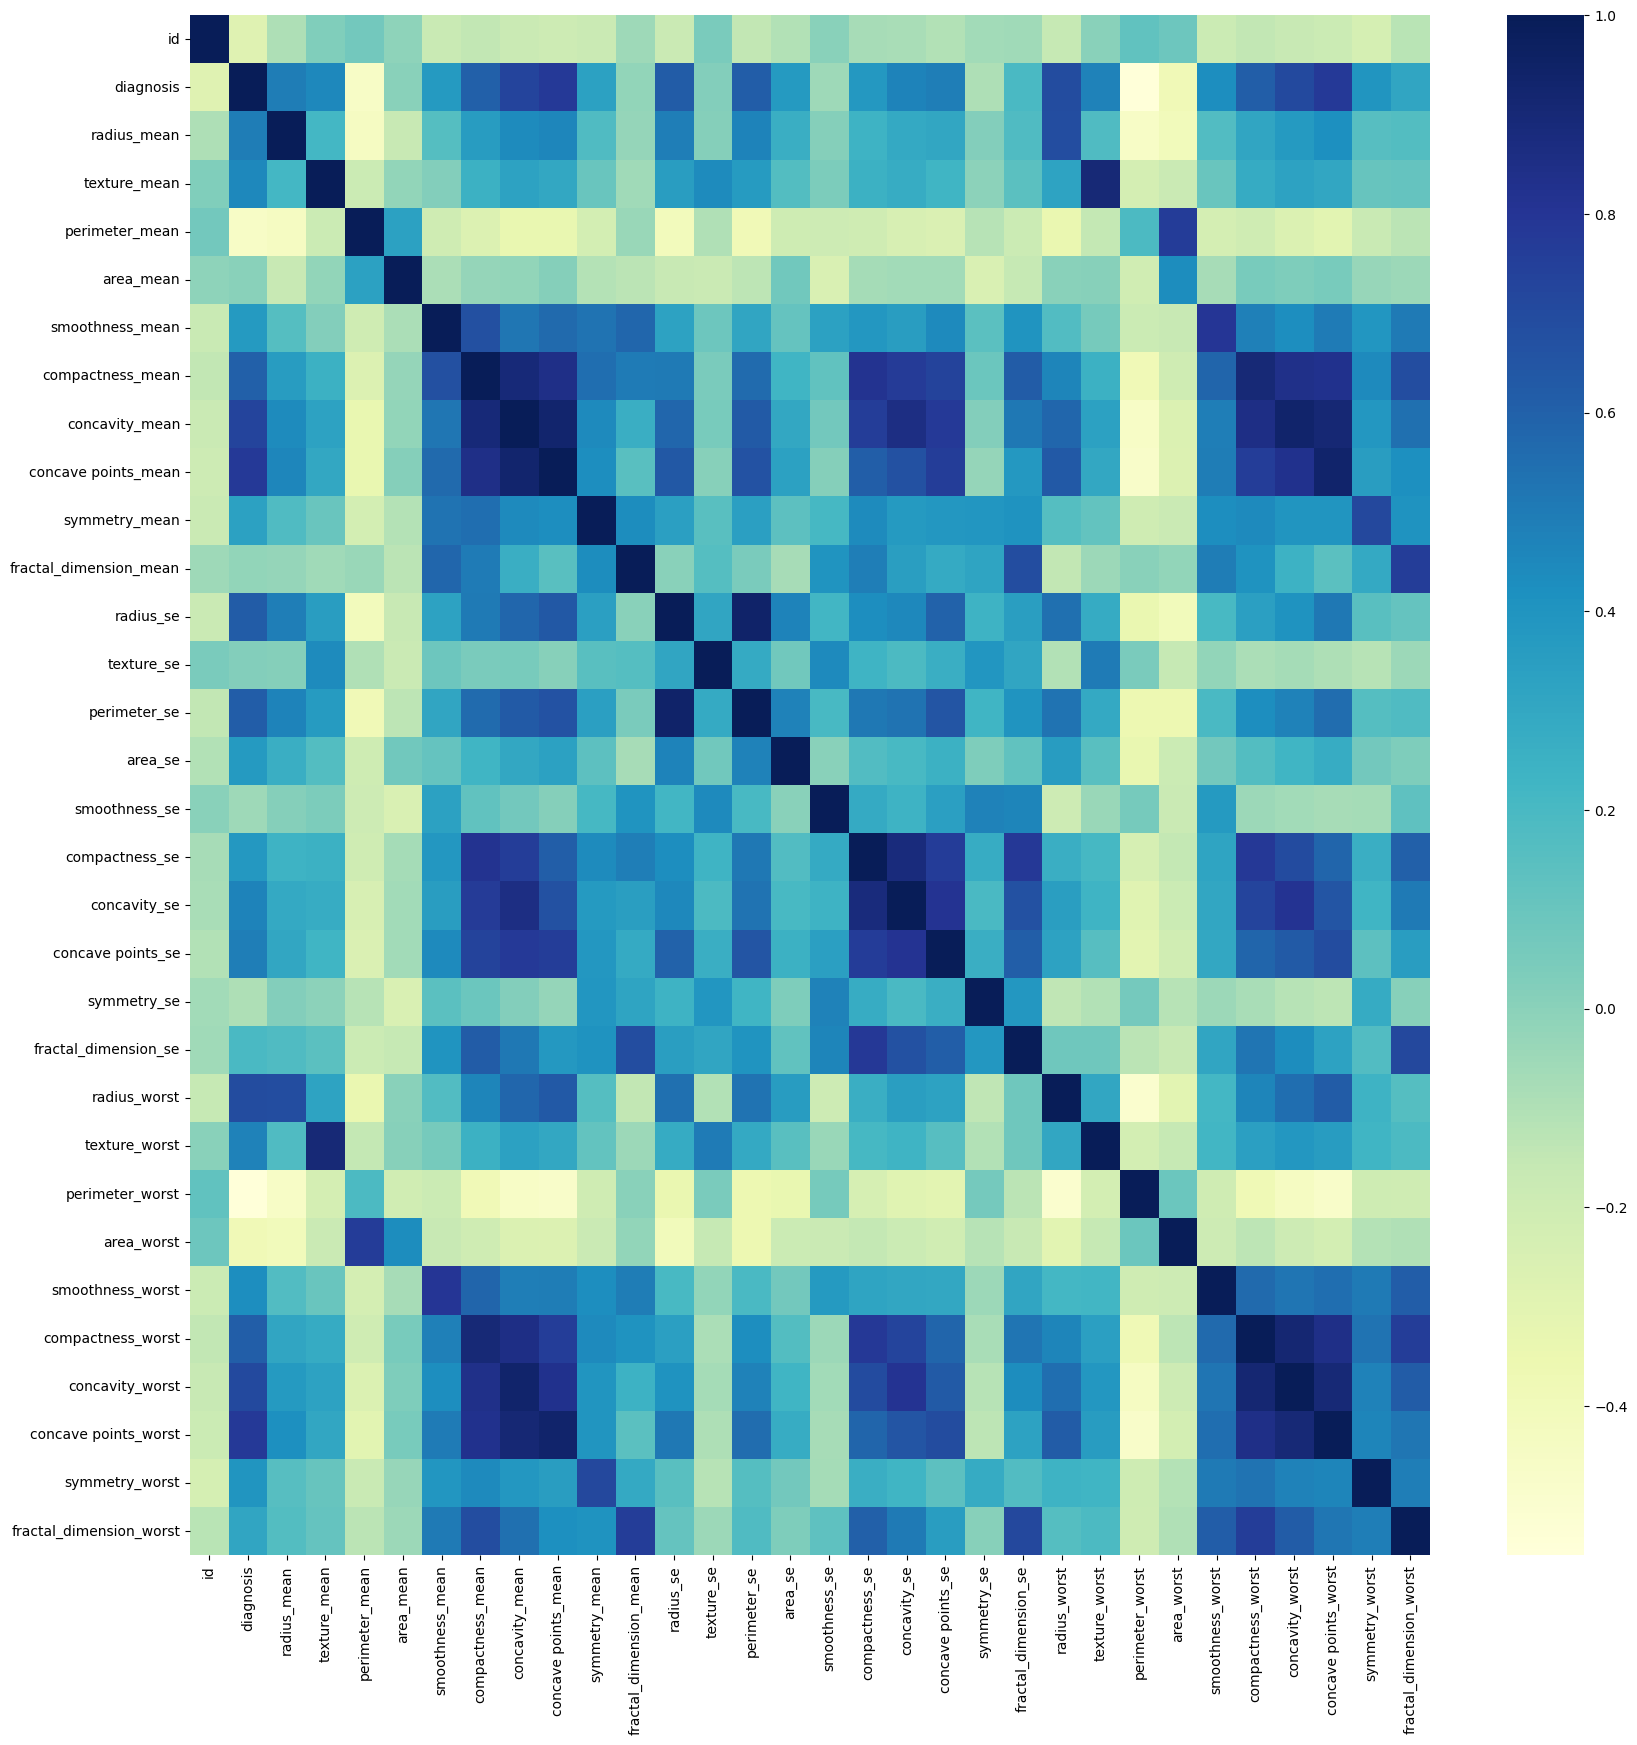

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(), annot=False, cbar=True, cmap='YlGnBu')
# sns.heatmap(df_num.corr(), annot=False, cbar=True, cmap='coolwarm')

--- 
### Boxplot-Dataframe:
--- 

<Axes: xlabel='diagnosis', ylabel='area_mean'>

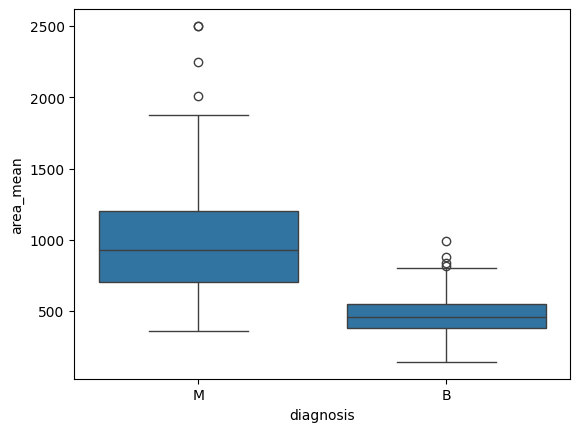

In [65]:
# plt.figure(figsize=(15,15))
sns.boxplot(data=df, x='diagnosis', y='area_mean')